In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [3]:
data=pd.read_csv("/content/diabetes.csv")

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.shape

(768, 9)

In [6]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

<Axes: >

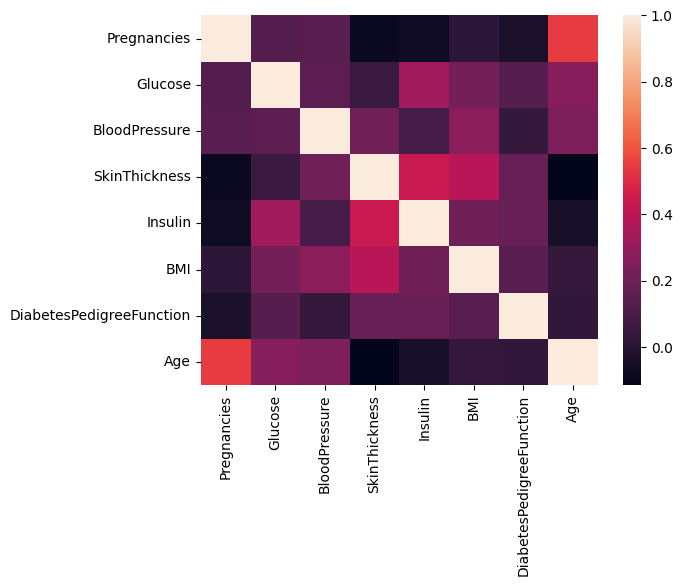

In [14]:
cor=data.drop(columns="Outcome").corr()

sns.heatmap(cor)

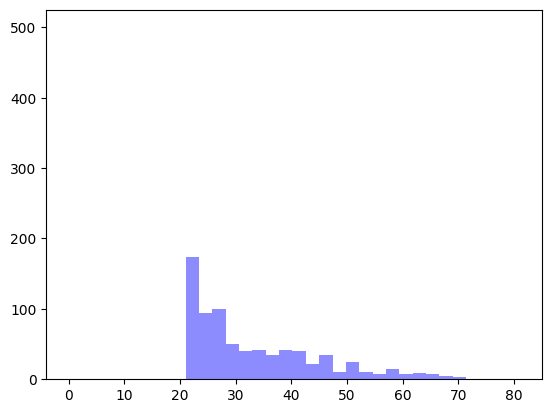

In [16]:
plt.hist(data['Outcome'], bins=25, alpha=0.45, color='red')
plt.hist(data['Age'], bins=25, alpha=0.45, color='blue')




plt.show()

##Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
target=data["Outcome"]

In [20]:
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
x=data.drop(["Outcome"],axis=1)


In [25]:
y=data["Outcome"]

In [65]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33)

In [66]:
xtrain

((514, 8), (514,))

In [67]:
xtest.shape,ytest.shape

((254, 8), (254,))

In [69]:
plt.figure( figsize = (12,6))
plt.scatter(xtrain, ytrain, c='b', label = 'Training data')
plt.scatter(xtest, ytest, c='g', label='Testing data')
plt.legend()

TypeError: ignored

<Figure size 1200x600 with 0 Axes>

In [53]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation="sigmoid"),
    tf.keras.layers.Dense(1,activation="relu")

])

In [156]:
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

In [157]:
history=model.fit(xtrain,ytrain,epochs=20)

Epoch 1/20
20/20 [==============================] - 1s 5ms/step - loss: 0.3443 - mae: 0.3443
Epoch 2/20
20/20 [==============================] - 0s 3ms/step - loss: 0.3456 - mae: 0.3456
Epoch 3/20
20/20 [==============================] - 0s 3ms/step - loss: 0.3440 - mae: 0.3440
Epoch 4/20
20/20 [==============================] - 0s 2ms/step - loss: 0.3436 - mae: 0.3436
Epoch 5/20
20/20 [==============================] - 0s 2ms/step - loss: 0.3432 - mae: 0.3432
Epoch 6/20
20/20 [==============================] - 0s 2ms/step - loss: 0.3432 - mae: 0.3432
Epoch 7/20
20/20 [==============================] - 0s 2ms/step - loss: 0.3435 - mae: 0.3435
Epoch 8/20
20/20 [==============================] - 0s 2ms/step - loss: 0.3431 - mae: 0.3431
Epoch 9/20
20/20 [==============================] - 0s 2ms/step - loss: 0.3432 - mae: 0.3432
Epoch 10/20
20/20 [==============================] - 0s 2ms/step - loss: 0.3426 - mae: 0.3426
Epoch 11/20
20/20 [==============================] - 0s 2ms/step - lo

In [158]:
model.evaluate(xtest,ytest)

5/5 [==============================] - 0s 5ms/step - loss: 0.3482 - mae: 0.3482


[0.3481765687465668, 0.3481765687465668]

##Using a Different Model

In [98]:
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="sigmoid"),
    tf.keras.layers.Dense(1,activation="relu")

])

In [159]:
model1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

In [150]:
history1=model1.fit(xtrain,ytrain,epochs=20)

Epoch 1/20
20/20 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.6531
Epoch 2/20
20/20 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.6531
Epoch 3/20
20/20 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.6531
Epoch 4/20
20/20 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.6531
Epoch 5/20
20/20 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.6531
Epoch 6/20
20/20 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.6531
Epoch 7/20
20/20 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.6531
Epoch 8/20
20/20 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.6531
Epoch 9/20
20/20 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.6531
Epoch 10/20
20/20 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.6531
Epoch 11/20
20/20 [

In [160]:
model1.evaluate(xtest,ytest)

5/5 [==============================] - 0s 6ms/step - loss: 0.3571 - mae: 0.3571


[0.3571428656578064, 0.3571428656578064]

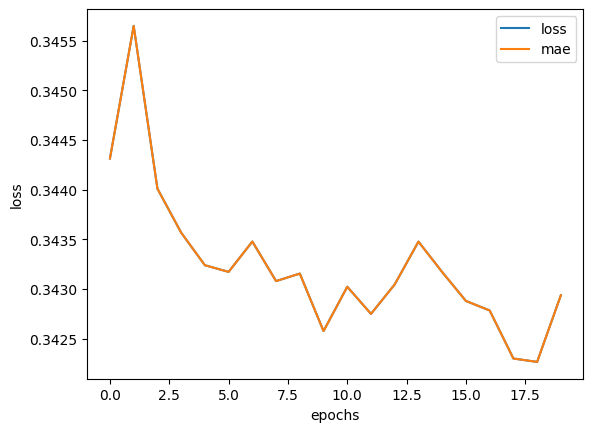

In [161]:
##Model1 Results
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");


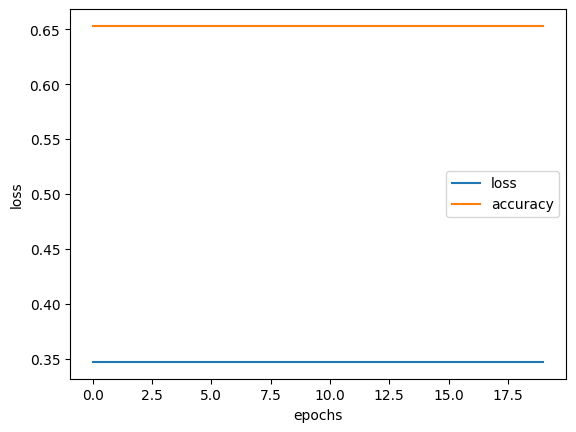

In [162]:
#Model2 results
pd.DataFrame(history1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");


##PreProcessing Data with ONeHOtEncoder

In [114]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [137]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["Pregnancies", "Glucose", "BloodPressure","SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction","Age"	]), # get all values between 0 and 1

)

# Create X & y
x = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Build our train and test sets (use random state to ensure same split as before)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(xtrain)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
xtrain_normal = ct.transform(xtrain)
xtest_normal = ct.transform(xtest)

In [139]:
xtrain.loc[0],xtrain_normal[0]

(Pregnancies                   6.000
 Glucose                     148.000
 BloodPressure                72.000
 SkinThickness                35.000
 Insulin                       0.000
 BMI                          33.600
 DiabetesPedigreeFunction      0.627
 Age                          50.000
 Name: 0, dtype: float64,
 array([0.11764706, 0.42211055, 0.        , 0.        , 0.        ,
        0.        , 0.09649872, 0.        ]))

In [163]:
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history4=model3.fit(xtrain_normal, ytrain, epochs=200, )

Epoch 1/200
20/20 [==============================] - 1s 3ms/step - loss: 0.4130 - mae: 0.4130
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3629 - mae: 0.3629
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3527 - mae: 0.3527
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3473 - mae: 0.3473
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3501 - mae: 0.3501
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3414 - mae: 0.3414
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3416 - mae: 0.3416
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3415 - mae: 0.3415
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3328 - mae: 0.3328
Epoch 10/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3368 - mae: 0.3368
Epoch 11/200
20/20 [==============================] - 0s 2m

In [174]:
preds=model.predict(xtest)

5/5 [==============================] - 0s 3ms/step


In [175]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, preds)

0.3301971019388391

<Axes: >

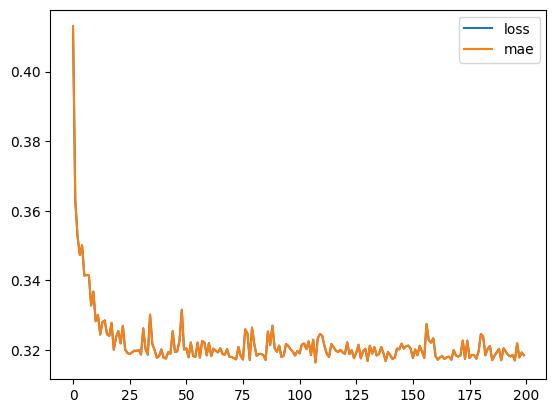

In [176]:
pd.DataFrame(history4.history).plot()

In [177]:
 from sklearn.metrics import accuracy_score
 accuracy_score(ytest, tf.round(preds))

0.6493506493506493

In [178]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, tf.round(preds))

array([[99,  0],
       [54,  1]])

In [179]:
 from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(ytest, tf.round(preds), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.65      1.00      0.79        99
     class 1       1.00      0.02      0.04        55

    accuracy                           0.65       154
   macro avg       0.82      0.51      0.41       154
weighted avg       0.77      0.65      0.52       154

